# Introduction to FCNN

## Learning Objectives
* Constructing, training, and evaluating a FCNN.

## Submission Instructions
**After completing the assignments, please upload a PDF output of this notebook.**

This is an individual assignment, but you may discuss your code with your neighbors.

In [1]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.insert(0,'..') # change this for your system

import numpy as np

import py487

## Dataset

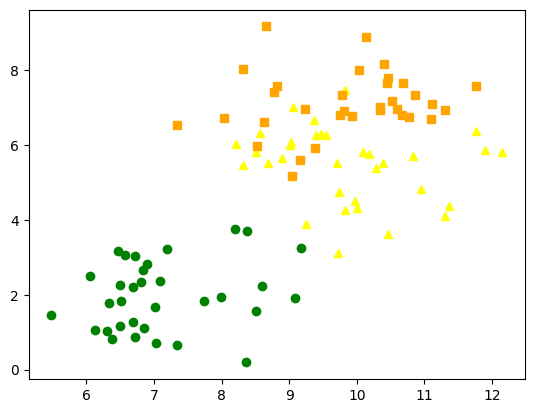

In [79]:
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(4)
X, t = datasets.make_blobs(n_samples=100, centers=3, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][t == 0], X[:, 1][t == 0], marker='^',linestyle="None" ,color='yellow')
plt.plot(X[:, 0][t == 1], X[:, 1][t == 1], marker='s',linestyle="None",color='orange')
plt.plot(X[:, 0][t == 2], X[:, 1][t == 2], marker='o',linestyle="None",color='green')
plt.show()

## Assignment instructions
Construct and evaluate a multi-layer perceptron similar to the XOR example we've reviewed as a class. Evaluation must be carried out on a test set that was not used for training. You must stick to one hidden layer and then the output layer. The number of nodes in the hidden layer is entirely up to you. The decisions on how to code your solution is up to you, but you must use pytorch and structure your solution similar to how we coded the XOR. You can bring the training loop outside the class definition as that was just my preference for the XOR example. You must compute precision, recall, and the f1-score for the testing dataset and provide a breakdown for each class. Be careful about overfitting and show how you checked for overfitting. 

In [81]:
import torch
import torch.optim as optim
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,nhidden=3,nin=2):
        super(Net, self).__init__()
        self.nhidden = nhidden
        self.nin = nin
        hidden_nodes = []
        for _ in range(nhidden):
            hidden_nodes.append(torch.nn.Parameter((torch.rand(self.nin+1,1)-.5)*2/torch.sqrt(torch.tensor(2))))
        self.hidden_nodes = nn.ParameterList(hidden_nodes)
        self.output = nn.Linear(nhidden, 3, bias=True)
        self.loss = None
        self.criterion = nn.CrossEntropyLoss()
        self.unfreeze()

    def forward(self, x):
        x = torch.cat((x,-torch.ones((x.shape[0],1))),axis=1)
        ys = []
        for h in self.hidden_nodes:
            ys.append(torch.matmul(x,h))
        y = torch.cat(ys,dim=1)
        y = torch.sigmoid(y) # end of the hidden layer forward step?
        y = torch.sigmoid(self.output(y))
        return y

    def fit(self, x_data, y_data, nepochs=1000):
        optimizer = optim.SGD(self.parameters(), lr=0.5, momentum=0.9)

        ntry = 1
        while ntry <= 10:
            for epoch in range(nepochs):  # loop over the dataset multiple times
                #for ix in range(len(x_data)):
                inputs, labels = x_data,y_data # x_data[[ix],:],y_data[[ix],:]

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = self(inputs)
                #print(inputs,outputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                if epoch % 100 == 0:
                  #print(outputs)
                  #print("\n".join([str(s) for s in list(net.hidden.parameters())]))
                  print(f'[{epoch + 1}] loss:',loss.data.numpy())
            if torch.sum(self.predict(inputs) == labels)/len(labels) == 1.:
                print('Finished training')
                break
            else:
                print('Running the fit loop again,',ntry)
            ntry+=1

        self.loss = loss.data

        return self # Essential an error

    def freeze(self):
        # Freeze all the parameters in the network
        for param in self.parameters():
            param.requires_grad = False

    def unfreeze(self):
        # Freeze all the parameters in the network
        for param in self.parameters():
            param.requires_grad = True

    def predict(self,x):
        return torch.round(self.forward(x))

In [111]:
net = Net()
list(net.parameters())
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(list(map(lambda num: [1.0 if num == 0 else 0.0, 1.0 if num == 1 else 0.0, 1.0 if num == 2 else 0.0], t)))
net.fit(x,y)
net.predict(x)

[1] loss: 1.0986073
[101] loss: 0.8064844
[201] loss: 0.7588697
[301] loss: 0.73621374
[401] loss: 0.7230835
[501] loss: 0.71427625
[601] loss: 0.70843405
[701] loss: 0.70434755
[801] loss: 0.70131034
[901] loss: 0.6988759
Running the fit loop again, 1
[1] loss: 0.69665986
[101] loss: 0.6944146
[201] loss: 0.6903205
[301] loss: 0.6774833
[401] loss: 0.6706926
[501] loss: 0.6687139
[601] loss: 0.66577893
[701] loss: 0.6625401
[801] loss: 0.6586618
[901] loss: 0.6545508
Running the fit loop again, 2
[1] loss: 0.6503327
[101] loss: 0.6461388
[201] loss: 0.6483133
[301] loss: 0.63922316
[401] loss: 0.6375531
[501] loss: 0.63601786
[601] loss: 0.6345605
[701] loss: 0.63310987
[801] loss: 0.6316051
[901] loss: 0.6300421
Running the fit loop again, 3
[1] loss: 0.6284622
[101] loss: 0.62691873
[201] loss: 0.62545764
[301] loss: 0.62410754
[401] loss: 0.6228788
[501] loss: 0.62176895
[601] loss: 0.6207688
[701] loss: 0.6198659
[801] loss: 0.61904633
[901] loss: 0.61829525
Running the fit loop a

tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1